# Gyroscope DDPG reward function testing (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

## Plot rewards

iter0_base 1000
iter0_reward01 1000
iter0_reward02 1000
iter0_reward03 1000
iter0_rs01 1000
iter0_rs02 1000
iter0_gamma01 1000
iter0_gamma02 1000
iter0_polyak01 1000
iter0_polyak02 1000
iter0_polyak03 1000
iter0_lr01 1000
iter0_lr02 1000
iter0_bs01 1000
iter0_bs02 1000
iter0_ss01 1000
iter0_ss02 1000
iter0_noise01 1000
iter0_noise02 1000


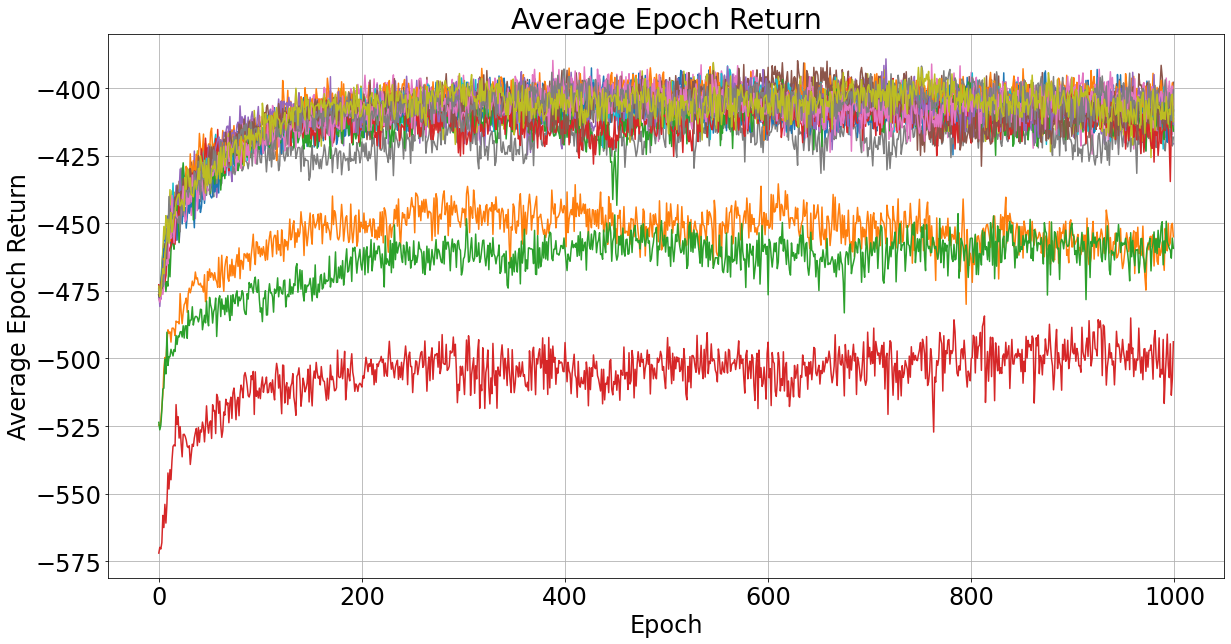

In [2]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
              'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02',
              'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
              'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

for agent_path in agent_paths:
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

# plt.xlim([0,500])
# plt.ylim([-2000,0])
# plt.legend(agent_paths,fontsize=24)

## Test an agent

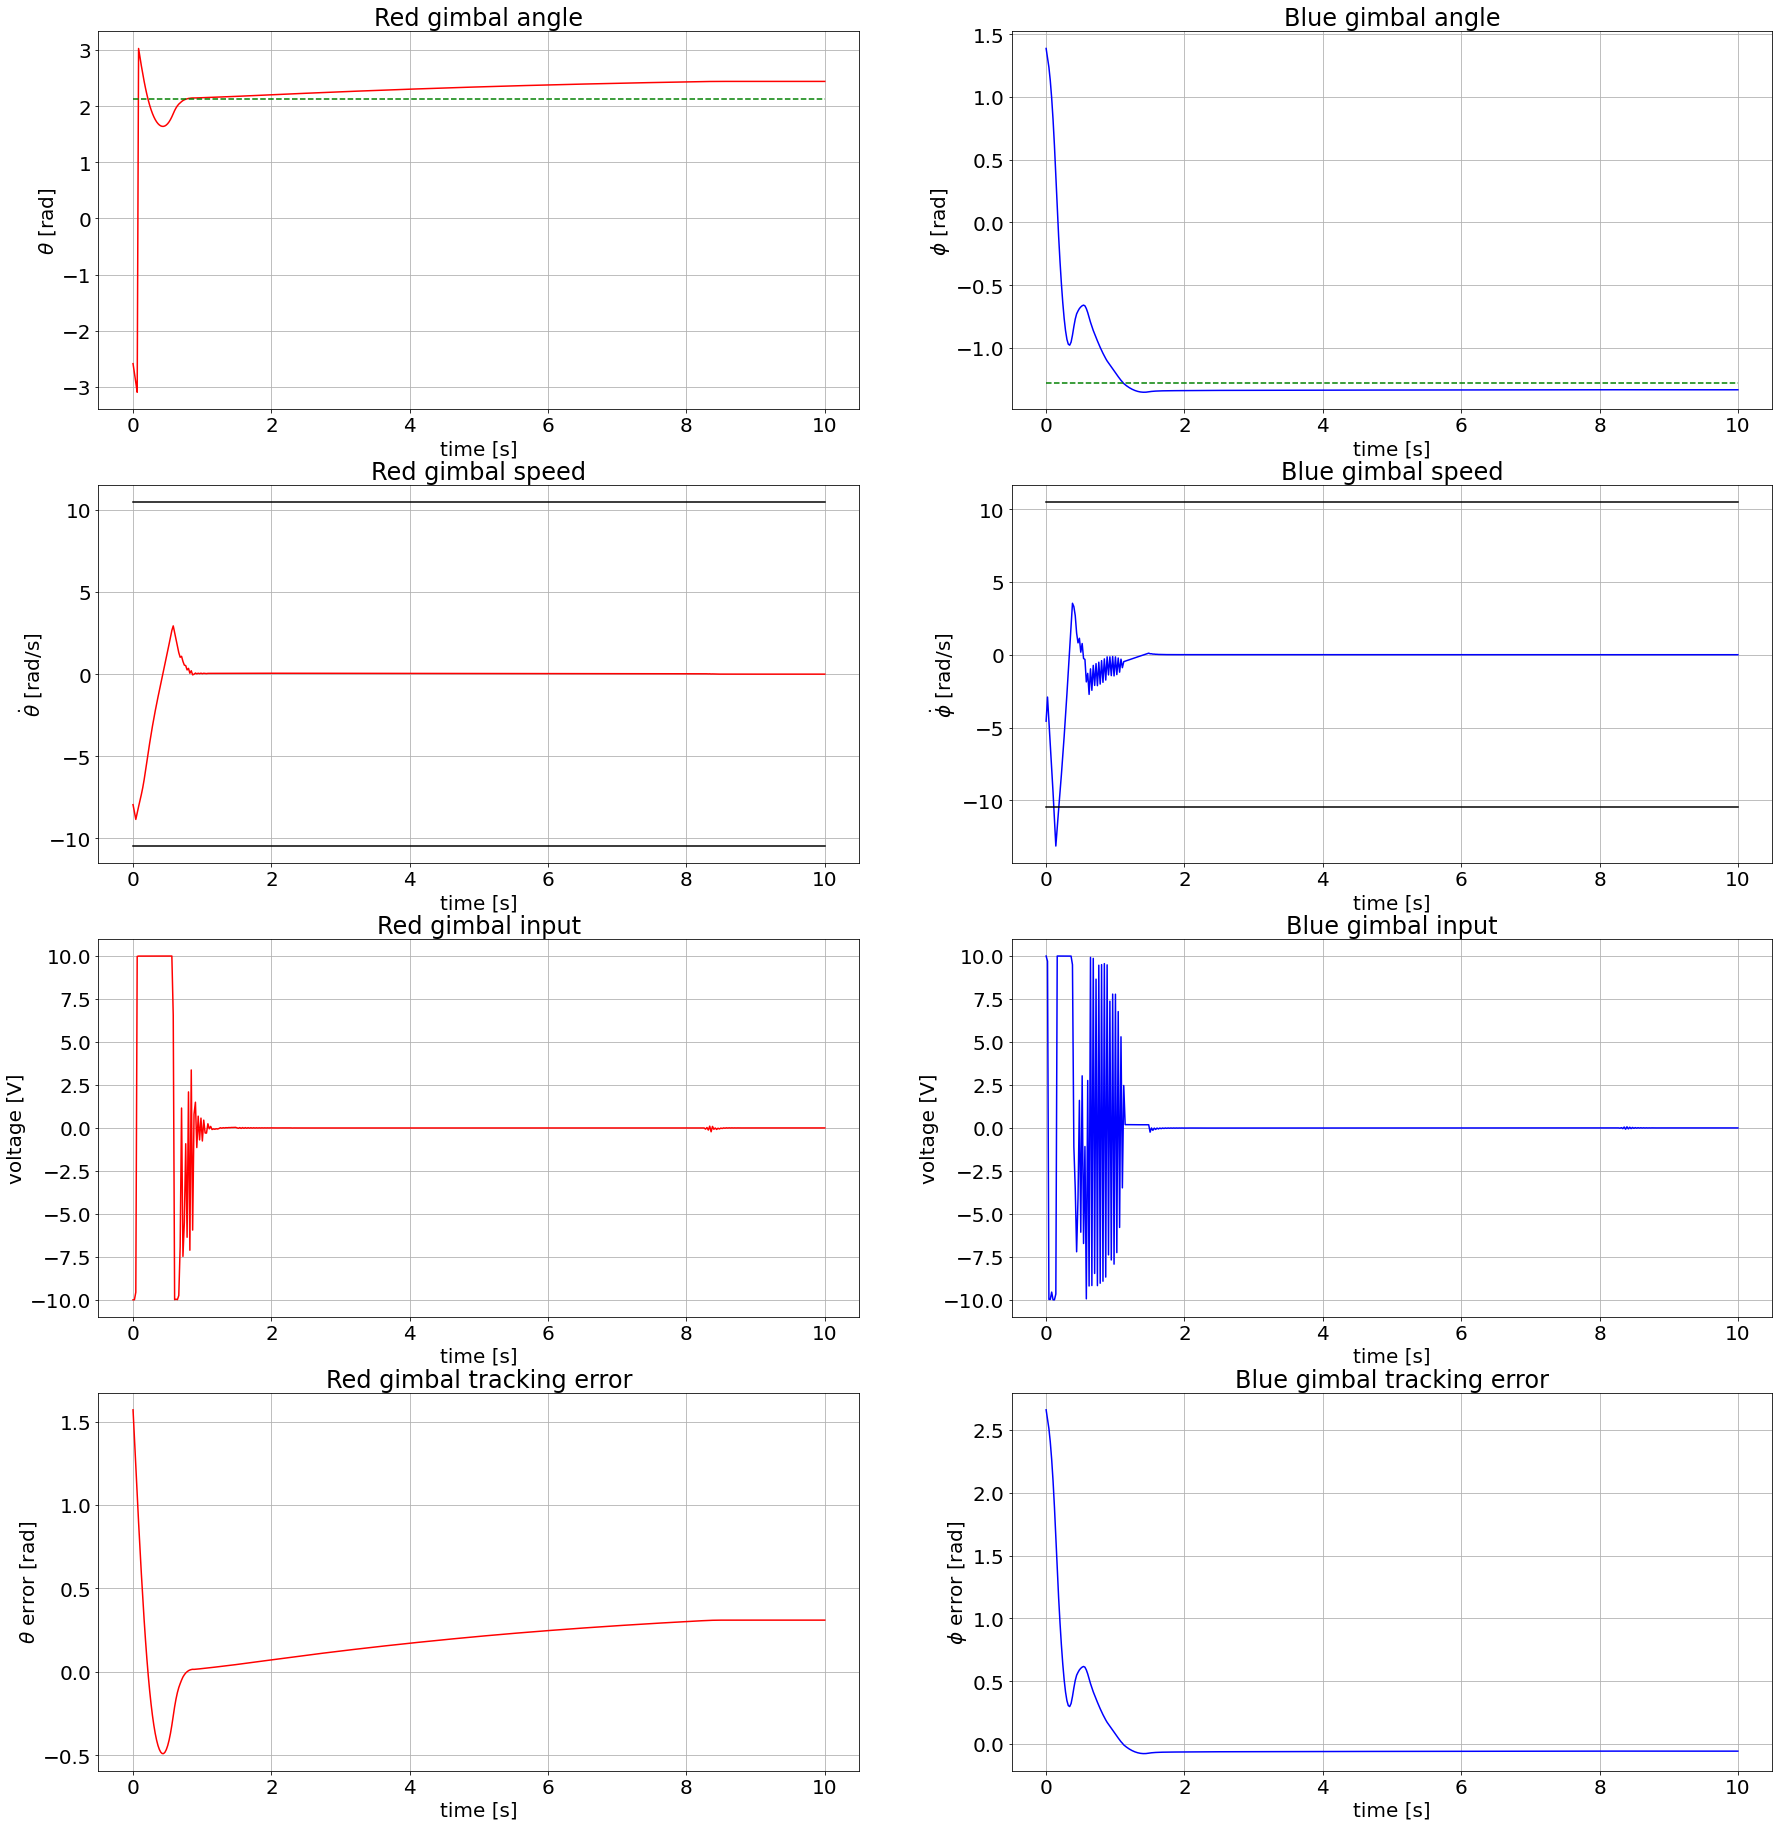

In [10]:
# Test paramaters
env_name = 'GyroscopeEnv-v1'
simu_args = {
    'dt': 0.02,
    'ep_len': 250,
    'seed': 2
}
reward_func = 'Power'
reward_args = {
    'qx1': 1, 
    'qx2': 0, 
    'qx3': 1, 
    'qx4': 0, 
    'pu1': 0, 
    'pu2': 0,
    'p': 0.05
}
# init_state = np.array([0,0,0,0,200/60*2*np.pi,45/180*np.pi,-60/180*np.pi])
env = create_env(env_name,simu_args,reward_func,reward_args,state=None)

agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
              'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02',
              'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
              'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

agent = load_agent(agent_paths[2])
t_end = 10

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

## Evaluate control performance

In [4]:
iter0_metrics = pd.read_csv('iter0_metrics.csv')
pd.set_option('display.max_columns', None)
iter0_metrics

,Unnamed: 0,iter0_base,iter0_reward01,iter0_reward02,iter0_reward03,iter0_rs01,iter0_rs02,iter0_gamma01,iter0_gamma02,iter0_polyak01,iter0_polyak02,iter0_polyak03,iter0_lr01,iter0_lr02,iter0_bs01,iter0_bs02,iter0_ss01,iter0_ss02,iter0_noise01,iter0_noise02
0,$\theta$ MAE (rad),0.2616,0.4228,0.3031,0.6952,0.3329,0.2289,0.3383,0.2201,0.2741,0.3307,0.2500,0.2121,0.2899,0.3556,0.2411,0.2352,0.2702,0.2529,0.2154
1,$\phi$ MAE (rad),0.0922,0.1302,0.1369,0.1094,0.1522,0.0904,0.1195,0.1532,0.1078,0.1029,0.0988,0.0902,0.1147,0.1304,0.0968,0.1159,0.0853,0.0990,0.1484
2,$\theta$ MSSE (rad),0.1274,0.2833,0.1603,0.5457,0.2105,0.1079,0.1929,0.1197,0.1395,0.2040,0.1245,0.1057,0.1514,0.2243,0.1334,0.1025,0.1413,0.1467,0.0996
3,$\phi$ MSSE (rad),0.0394,0.0788,0.0741,0.0494,0.0911,0.0338,0.0617,0.0862,0.0528,0.0394,0.0488,0.0336,0.0599,0.0489,0.0420,0.0492,0.0318,0.0390,0.0812
4,$\theta$ in bounds (%),94.8400,82.7300,91.1600,70.7100,87.8900,95.7300,90.5200,85.8200,92.3300,81.8600,92.8500,95.3300,90.8700,75.0100,92.4200,94.2300,93.9800,85.5800,94.9600
5,$\phi$ in bounds (%),95.9600,88.7700,93.2200,98.0700,91.4300,97.5000,93.7900,88.0300,93.9400,97.3900,97.1400,99.1300,95.7900,92.7700,98.5100,97.8000,98.7800,99.0400,95.8300
6,$\theta$ unsteady (%),0.5800,1.7300,1.2700,2.2600,0.6800,0.8600,1.2000,3.0300,0.6400,1.2800,0.5200,0.3400,0.7500,2.7800,0.2300,0.8200,0.7000,0.8300,0.8200
7,$\phi$ unsteady (%),2.8100,4.3700,1.8800,1.2900,1.8800,1.4500,1.4800,7.3800,3.9100,1.3900,0.5900,0.4800,1.1300,6.0200,0.2200,0.7000,1.0600,0.6100,0.8500
8,$\theta$ rise time (s),0.6388,0.7552,0.7018,0.8395,0.7698,0.5960,0.6729,0.4505,0.7612,0.7175,0.6600,0.6027,0.6953,0.6789,0.5582,0.5499,0.6202,0.5811,0.5214
9,$\phi$ rise time (s),0.2899,0.3427,0.3113,0.3377,0.3220,0.3209,0.2881,0.3446,0.2921,0.2882,0.3012,0.3086,0.3263,0.3227,0.2990,0.2804,0.3137,0.3370,0.3397


In [ ]:
# metrics = pd.read_csv(agent_paths[0]+'_metrics.csv')
# for ap in agent_paths[1:]:
#     m = pd.read_csv(ap+'_metrics.csv')
#     metrics = pd.concat([metrics, m.iloc[:,1:]], axis=1)
# metrics = metrics.round(4)
# metrics.to_csv('iter0_metrics.csv',index=False)